In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import torch
import numpy as np
import pickle
import os
import copy

# Custom scripts
from utils.dataset_utils import create_preprocessed_datasets
from inputs_perov_data_v2_singleAE.dataset_inputs import list_of_nn_datasets_dict
from utils.custom_utils import set_global_random_seed, save_to_pickle, read_from_pickle

global_seed = 0
set_global_random_seed(0)

kfolds = 5
run_dir = '../runs/perovskite_multiscale_dataset_3'
model_dir = 'singleAE_fold0'
target = 'PCE'

Global seed set to 0


## LASSO

In [2]:
lasso_train_mae = []
lasso_test_mae = []
# Concatenate all the dictionary values with the key specified as the descriptor
for i in range(kfolds):
    train_dataset = torch.load(f'{run_dir}/{model_dir}/datasets/train_dataset_fold_{i}.pt')
    val_dataset = torch.load(f'{run_dir}/{model_dir}/datasets/val_dataset_fold_{i}.pt')

    descriptors = copy.deepcopy(train_dataset.variable_names)
    print(descriptors)
    descriptors.remove(target)
    print(descriptors)

    X_train = torch.cat([train_dataset[:][descriptor] for descriptor in descriptors], dim=1).detach().numpy()
    y_train = train_dataset[:][target].detach().numpy().ravel()
    X_test = torch.cat([val_dataset[:][descriptor] for descriptor in descriptors], dim=1).detach().numpy()
    y_test = val_dataset[:][target].detach().numpy().ravel()

    lasso = Lasso(random_state=global_seed, alpha=0.01)

    lasso.fit(X_train, y_train)

    lasso_train_mae.append(mean_absolute_error(y_train, lasso.predict(X_train)))
    lasso_test_mae.append(mean_absolute_error(y_test, lasso.predict(X_test)))
    print(f'Fold {i}')
    print(f'Train MAE : {lasso_train_mae[-1]}')
    print(f'Test MAE : {lasso_test_mae[-1]}')

['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
Fold 0
Train MAE : 2.8933792114257812
Test MAE : 3.11700439453125
['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
Fold 1
Train MAE : 2.959690570831299
Test MAE : 2.8460662364959717
['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
Fold 2
Train MAE : 2.9029347896575928
Test MAE : 3.0419998168945312
['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
Fold 3
Train MAE : 2.9198238849639893
Test MAE : 2.972219467163086
['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
Fold 4
Train MAE : 2.979440212249756
Test MAE : 2.758727550506592


In [3]:
gbregressor_train_mae = []
gbregressor_test_mae = []
for i in range(kfolds):
    train_dataset = torch.load(f'{run_dir}/{model_dir}/datasets/train_dataset_fold_{i}.pt')
    val_dataset = torch.load(f'{run_dir}/{model_dir}/datasets/val_dataset_fold_{i}.pt')

    descriptors = copy.deepcopy(train_dataset.variable_names)
    print(descriptors)
    descriptors.remove(target)
    print(descriptors)

    X_train = torch.cat([train_dataset[:][descriptor] for descriptor in descriptors], dim=1).detach().numpy()
    print(X_train.shape)
    y_train = train_dataset[:][target].detach().numpy().ravel()
    X_test = torch.cat([val_dataset[:][descriptor] for descriptor in descriptors], dim=1).detach().numpy()
    y_test = val_dataset[:][target].detach().numpy().ravel()

    gbregressor = GradientBoostingRegressor(random_state=global_seed, n_estimators=300, learning_rate=0.01, max_depth=5, subsample=0.5, loss='absolute_error')
    gbregressor.fit(X_train, y_train)

    gbregressor_train_mae.append(mean_absolute_error(y_train, gbregressor.predict(X_train)))
    gbregressor_test_mae.append(mean_absolute_error(y_test, gbregressor.predict(X_test)))
    print(f'Fold {i}')
    print(f'Train Loss : {gbregressor_train_mae[-1]}')
    print(f'Test Loss : {gbregressor_test_mae[-1]}')
    print('\n')

['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
(1614, 26)
Fold 0
Train Loss : 2.4639922095060123
Test Loss : 2.598866464812016


['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
(1614, 26)
Fold 1
Train Loss : 2.498603640464378
Test Loss : 2.4454734950784753


['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
(1614, 26)
Fold 2
Train Loss : 2.454296314782977
Test Loss : 2.7119173063312125


['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
(1615, 26)
Fold 3
Train Loss : 2.4725420541202765
Test Loss : 2.583189970909964


['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
(1615, 26)
Fold 4
Train Loss : 2.4700428867055964
Test Loss : 2.6419519196125014




In [4]:
svr_train_mae = []
svr_test_mae = []
for i in range(kfolds):
    train_dataset = torch.load(f'{run_dir}/{model_dir}/datasets/train_dataset_fold_{i}.pt')
    val_dataset = torch.load(f'{run_dir}/{model_dir}/datasets/val_dataset_fold_{i}.pt')

    descriptors = copy.deepcopy(train_dataset.variable_names)
    print(descriptors)
    descriptors.remove(target)
    print(descriptors)

    X_train = torch.cat([train_dataset[:][descriptor] for descriptor in descriptors], dim=1).detach().numpy()
    y_train = train_dataset[:][target].detach().numpy().ravel()
    X_test = torch.cat([val_dataset[:][descriptor] for descriptor in descriptors], dim=1).detach().numpy()
    y_test = val_dataset[:][target].detach().numpy().ravel()

    svr = SVR(kernel='rbf', gamma='scale', C=10.0, epsilon=0.1)
    svr.fit(X_train, y_train)

    svr_train_mae.append(mean_absolute_error(y_train, svr.predict(X_train)))
    svr_test_mae.append(mean_absolute_error(y_test, svr.predict(X_test)))
    print(f'Fold {i}')
    print(f'Train Loss : {svr_train_mae[-1]}')
    print(f'Test Loss : {svr_test_mae[-1]}') 
    print('\n')

['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
Fold 0
Train Loss : 2.452386389035206
Test Loss : 2.6209160724475615


['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
Fold 1
Train Loss : 2.4879463252468943
Test Loss : 2.488508755181451


['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
Fold 2
Train Loss : 2.4384343479823296
Test Loss : 2.711951235861701


['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
Fold 3
Train Loss : 2.4571841085778954
Test Loss : 2.62059650489938


['all_props', 'etm', 'htm', 'PCE']
['all_props', 'etm', 'htm']
Fold 4
Train Loss : 2.4653344302175224
Test Loss : 2.6138988161005616




## Plotting the mean and deviation results

In [5]:
lasso_mean_train_mae = np.mean(lasso_train_mae)
lasso_std_train_mae = np.std(lasso_train_mae)

lasso_mean_test_mae = np.mean(lasso_test_mae)
lasso_std_test_mae = np.std(lasso_test_mae)

gbregressor_mean_train_mae = np.mean(gbregressor_train_mae)
gbregressor_std_train_mae = np.std(gbregressor_train_mae)

gbregressor_mean_test_mae = np.mean(gbregressor_test_mae)
gbregressor_std_test_mae = np.std(gbregressor_test_mae)

svr_mean_train_mae = np.mean(svr_train_mae)
svr_std_train_mae = np.std(svr_train_mae)

svr_mean_test_mae = np.mean(svr_test_mae)
svr_std_test_mae = np.std(svr_test_mae)

# RAN ONLY 2 SCALE VARIABLES !!
# Model with least total val loss across 5 folds (Hidden dim:50, Hidden lay:2, Hidden act: ReLU, Latent dim:15)
# Data from wandb.ai/nthota2/perovskite_multiscale_dataset_v2/runs/distinctive_sweep_23 (fold0)
# Data from wandb.ai/nthota2/perovskite_multiscale_dataset_v2/runs/sandy_sweep_23 (fold1)
# Data from wandb.ai/nthota2/perovskite_multiscale_dataset_v2/runs/scarlet_sweep_23 (fold2)
# Data from wandb.ai/nthota2/perovskite_multiscale_dataset_v2/runs/glad_sweep_23 (fold3)
# Data from wandb.ai/nthota2/perovskite_multiscale_dataset_v2/runs/silver_sweep_23 (fold4)
# singleAE_mean_train_mae = np.mean([1.479, 1.461, 1.428, 1.495, 1.488])
# singleAE_std_train_mae = np.std([1.479, 1.461, 1.428, 1.495, 1.488])

# singleAE_mean_test_mae = np.mean([2.362, 2.6, 2.629, 2.387, 2.49])
# singleAE_std_test_mae = np.std([2.362, 2.6, 2.629, 2.387, 2.49])

# # Most parsimonious model (Hidden dim:25, Hidden lay:1, Hidden act: ReLU, Latent dim:15)
# # Data from wandb.ai/nthota2/perovskite_multiscale_dataset_v2/runs/misty_sweep_5 (fold0)
# # Data from wandb.ai/nthota2/perovskite_multiscale_dataset_v2/runs/super_sweep_5 (fold1)
# # Data from wandb.ai/nthota2/perovskite_multiscale_dataset_v2/runs/light_sweep_5 (fold2)
# # Data from wandb.ai/nthota2/perovskite_multiscale_dataset_v2/runs/tough_sweep_5 (fold3)
# # Data from wandb.ai/nthota2/perovskite_multiscale_dataset_v2/runs/olive_sweep_5 (fold4)
# singleAE_parsimonious_mean_train_mae = np.mean([1.657, 1.601, 1.634, 1.602, 1.626])
# singleAE_parsimonious_std_train_mae = np.std([1.657, 1.601, 1.634, 1.602, 1.626])

# singleAE_parsimonious_mean_test_mae = np.mean([2.3, 2.672, 2.702, 2.605, 2.661])
# singleAE_parsimonious_std_test_mae = np.std([2.3, 2.672, 2.702, 2.605, 2.661])

# RAN WITH PSC_efficiencies_dataset_2.csv
# singleAE_mean_train_mae = np.mean([0.780144036, 0.643618464, 0.669580162, 0.695990801, 0.703964412])
# singleAE_std_train_mae = np.std([0.780144036, 0.643618464, 0.669580162, 0.695990801, 0.703964412])

# singleAE_mean_test_mae = np.mean([2.749218702, 3.100399733, 2.816265345, 3.072718859, 2.579235315])
# singleAE_std_test_mae = np.std([2.749218702, 3.100399733, 2.816265345, 3.072718859, 2.579235315])

# RAN WITH 2 SCALE VARIABLES : PSC_efficiencies_dataset.csv
singleAE_mean_train_mae = np.mean([2.392929077, 2.436, 2.373, 2.35, 2.481])
singleAE_std_train_mae = np.std([2.392929077, 2.436, 2.373, 2.35, 2.481])

singleAE_mean_test_mae = np.mean([2.308400393, 2.435785532, 2.38911939, 2.283526659, 2.328299284])
singleAE_std_test_mae = np.std([2.308400393, 2.435785532, 2.38911939, 2.283526659, 2.328299284])

nestedAE_mean_train_mae = np.mean([2.403, 2.415, 2.351, 2.4, 2.474])
nestedAE_std_train_mae = np.std([2.403, 2.415, 2.351, 2.4, 2.474])

nestedAE_mean_test_mae = np.mean([2.338, 2.375, 2.4, 2.286, 2.332])
nestedAE_std_test_mae = np.std([2.338, 2.375, 2.4, 2.286, 2.332])



 --> Submodule encoder layers :
ModuleList(
  (0): Linear(in_features=23, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=20, bias=True)
  (3): ReLU()
)


 --> Submodule PCE_pred layers :
ModuleList(
  (0): Linear(in_features=20, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=1, bias=True)
  (3): ReLU()
)


 --> Submodule latents_pred layers :
ModuleList(
  (0): Linear(in_features=20, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=12, bias=True)
)


 --> Submodule etm_pred layers :
ModuleList(
  (0): Linear(in_features=20, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=7, bias=True)
)


 --> Submodule htm_pred layers :
ModuleList(
  (0): Linear(in_features=20, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=4, bias=True)
)


 --> Submodule encoder layers :
ModuleList(
  (0): Linear(in_features=23, o

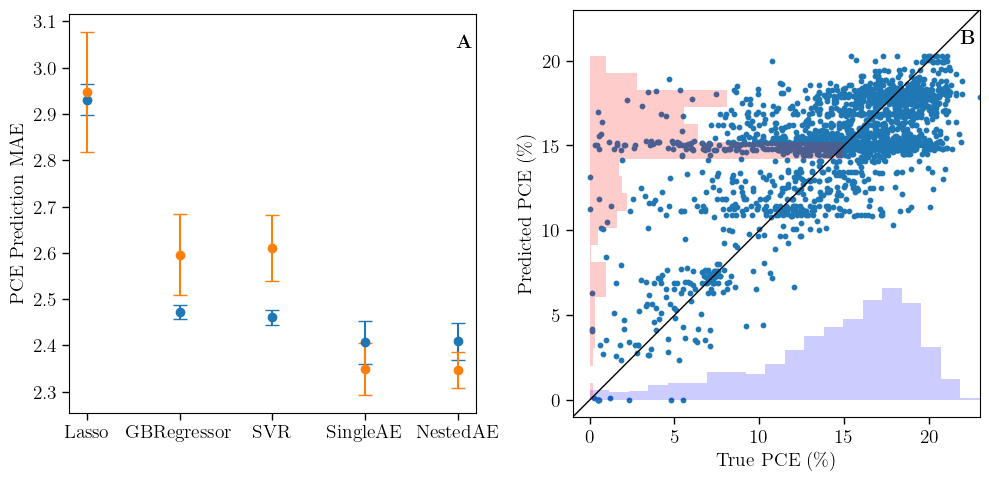

In [25]:
import yaml
import shutil
from nn.vanilla_ae import VanillaAE
import pandas as pd

plt.rcParams.update({
"text.usetex":True,
"font.family":"serif",
"font.serif":["Computer Modern Roman"]})
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].errorbar(['Lasso', 'GBRegressor', 'SVR', 'SingleAE', 'NestedAE'], 
               [lasso_mean_train_mae, gbregressor_mean_train_mae, svr_mean_train_mae, singleAE_mean_train_mae, nestedAE_mean_train_mae], 
                yerr=[lasso_std_train_mae, gbregressor_std_train_mae, svr_std_train_mae, singleAE_std_train_mae, nestedAE_std_train_mae],
                linestyle='None', marker='o',capsize=5, label='Train MAE')
axs[0].errorbar(['Lasso', 'GBRegressor', 'SVR', 'SingleAE', 'NestedAE'], 
               [lasso_mean_test_mae, gbregressor_mean_test_mae, svr_mean_test_mae, singleAE_mean_test_mae, nestedAE_mean_test_mae], 
               yerr=[lasso_std_test_mae, gbregressor_std_test_mae, svr_std_test_mae, singleAE_std_test_mae, nestedAE_std_test_mae], 
               linestyle='None', marker='o',capsize=5, label='Test MAE')
# # Label the mean values
# for i, txt in enumerate([lasso_mean_test_mae, gbregressor_mean_test_mae, svr_mean_test_mae, singleAE_mean_test_mae, nestedAE_mean_test_mae]):
#     axs[0].annotate(f'{txt:.2f}', (i, txt), textcoords="offset points", xytext=(0,10), ha='center')
axs[0].set_aspect(5)
axs[0].set_ylabel('PCE Prediction MAE')
axs[0].text(0.95, 0.95, r'\textbf{A}', transform=axs[0].transAxes, verticalalignment='top', fontsize=14)

# # Plot the true versus predicted bandgap
# bg_true_list = []
# bg_pred_list = []
# for i in range(5):
#     bg_true_filepath = f'../runs/perovskite_multiscale_dataset/ \
#         ae1_bg_predictor_enc_l_12_l1_1em2_tanh_pred_p_0_1_100_relu_dec_15_linear_seed_0_lr_1em3_bs_10_1500_epochs_mae_mtl_k_fold_{i}_xavier_normal/ \
#         datasets/val_dataset_preview_fold_{i}.csv'
#     val_dataset = pd.read_csv(bg_true_filepath, header=None, skiprows=[0])

# Plot the true versus preeicted PCE
pce_true_list = []
pce_pred_list = []
models_to_load = ['swept-sweep-30_fold_0', 'desert-sweep-30_fold_1', 'sparkling-sweep-30_fold_2', 'lucky-sweep-30_fold_3', 'young-sweep-30_fold_4']
# Get the true and predicted values for PCE (plotted are all validation data from each of teh 5 folds)
for i in range(5):
    pce_true_filepath = f'../runs/perovskite_multiscale_dataset_3/corrected_nestedAE_AE2_fold0/datasets/val_dataset_preview_fold_{i}.csv'
    # pce_true_filepath = f'../runs/perovskite_multiscale_dataset_3/corrected_nestedAE_AE2_fold{i}/datasets/dataset_preview.csv'
    val_dataset = pd.read_csv(pce_true_filepath, header=None, skiprows=[0])
    # val_dataset = pd.read_csv(pce_true_filepath, header=None)
    inputs_to_nestedAE_AE2 = {'latents':torch.tensor(val_dataset.iloc[:, 12:].values, dtype=torch.float32),
                                'etm':torch.tensor(val_dataset.iloc[:, 0:7].values, dtype=torch.float32),
                                'htm':torch.tensor(val_dataset.iloc[:, 7:11].values, dtype=torch.float32)}
    pce_true_list.extend(val_dataset.iloc[:, 11].values)

    # Load the model checkpoint
    model_dir = f'../runs/perovskite_multiscale_dataset_3/corrected_nestedAE_AE2_fold{i}/tune_nn_params/{models_to_load[i]}'
    nn_save_dir = yaml.safe_load(open(model_dir + '/files/config.yaml'))['nn_save_dir']['value']
    nn_params_dict = yaml.safe_load(open(model_dir + '/files/config.yaml'))['nn_params_dict']['value']
    nn_train_params_dict = yaml.safe_load(open(model_dir + '/files/config.yaml'))['nn_train_params_dict']['value']
    nn_datasets_dict = yaml.safe_load(open(model_dir + '/files/config.yaml'))['nn_datasets_dict']['value']
    new_nestedAE_AE2 = VanillaAE(nn_save_dir, nn_params_dict, nn_train_params_dict, nn_datasets_dict)
    os.mkdir('nestedAE_AE2_copied_ckpt')
    shutil.copy(model_dir + '/checkpoints/last.ckpt', 'nestedAE_AE2_copied_ckpt')
    loaded_nestedAE_AE2 = new_nestedAE_AE2.load_from_checkpoint('nestedAE_AE2_copied_ckpt/last.ckpt')
    shutil.rmtree('nestedAE_AE2_copied_ckpt')

    # submodule_outputs = loaded_nestedAE_AE2(inputs_to_nestedAE_AE2)
    submodule_outputs = loaded_nestedAE_AE2(inputs_to_nestedAE_AE2)
    pce_pred_list.extend(submodule_outputs['PCE_pred'].detach().numpy().ravel())

x2 = np.arange(-1, np.max(pce_true_list)+1, 1)
y2 = np.arange(-1, np.max(pce_true_list)+1, 1)
axs[1].scatter(pce_true_list, pce_pred_list, s=10)
axs[1].plot(x2, y2, color='black', linestyle='-', linewidth=1)
axs[1].set_xlabel(r'True PCE (\%)')
axs[1].set_ylabel(r'Predicted PCE (\%)')
axs[1].set_xlim(-1, np.max(pce_true_list))
axs[1].set_ylim(-1, np.max(pce_true_list))
axs[1].set_aspect('equal')
axs[1].text(0.95, 0.95, r'\textbf{B}', transform=axs[1].transAxes, verticalalignment='top', fontsize=14)
# axs[1].text(1.69, 0.1, r'Val. MAE = 2.384 \%', transform=axs[1].transAxes, verticalalignment='bottom', color='red')
# axs[1].text(1.67, 0.02, r'Val. RMSE = 3.240 \%', transform=axs[1].transAxes, fontsize=fontsize_labels, verticalalignment='bottom', color='red')

# Add a true PCE distribution and predicted PCE distribution on the X and Y axis respectievly
weights = (np.ones_like(pce_true_list)*50)/float(len(pce_true_list))
axs[1].hist(pce_true_list, bins=20, color='blue', alpha=0.2, orientation='vertical', weights=weights)
axs[1].hist(pce_pred_list, bins=20, color='red', alpha=0.2, orientation='horizontal', weights=weights)

# Save the pdf file
plt.tight_layout()
plt.savefig('model_comparison.pdf', bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Define the vertices of the polyhedron
vertices = np.array([
    [1, 0, 0], [0, 1, 0], [0, 0, 1], [1.2, 1.2, 0], [1.2, 0, 1.2], [0, 1.2, 1.2]
])

# Define the faces of the polyhedron
faces = [
    [vertices[0], vertices[3], vertices[4]],
    [vertices[1], vertices[3], vertices[5]],
    [vertices[2], vertices[4], vertices[5]],
    [vertices[3], vertices[4], vertices[5]],
    [vertices[0], vertices[3], vertices[1]],
    [vertices[0], vertices[4], vertices[2]],
    [vertices[1], vertices[5], vertices[2]],
    [vertices[0], vertices[1], vertices[2]]
]

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the polyhedron
poly = Poly3DCollection(faces, alpha=.25, linewidths=1, edgecolors='r')
ax.add_collection3d(poly)

# Set the limits and labels
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

